# Nonlinear modeling (usind Echo-State Network)

In [1]:
import os
import numpy as np
import pickle

### SELECT DATA
#from config import MRI5_NVF1_10mm_1p2mmV_1 as cfg
#from config import MRI5_NVF1_10mm_0p4mmV_1 as cfg
#from config import MRI8_NVF4_10mm_0p0mmVVV as cfg
#from config import MRI8_NVF4_10mm_0p0mmVVVV as cfg

#from config import MRI6_NVF2_10mm_2mmV_1 as cfg
#from config import MRI6_NVF2_10mm_1p8mmV_1 as cfg

#from config import MRI6_NVF2_10mm_1p2mmV_1 as cfg
#from config import MRI6_NVF2_10mm_0p4mmV_1 as cfg

os.chdir('../')
from lib.methods import *

fig = Figure_BCVVFC({
                    'font.family':'Times New Roman',
                    'mathtext.fontset':'stix',
                    'font.size':30,
                    })

2023-05-01 21:01:21.415960: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
class MRI8_NVF4_10mm_0p0mmVVVV:
    FILE_DIR = './data/VF_FVF_DATASETS/CSV/'
    DATA_NAME = 'MRI8_NVF4_10mm_0p0mmVVVV'
    ADDITIONAL_PATH = ''
    SAMPLE_SPAN = [160000, 180000]
    FILTER_METHOD = 'bandpass_filtering'
    BANDPASS_PARAMS = {
                    'passband_edge_freq':[100, 450], 
                    'stopband_edge_freq':[50, 800], 
                    'passband_edge_max_loss':1, 
                    'stopband_edge_min_loss':20
                    }
    ESN_PARAMS = {
                'units':500, 
                'SR':1.1, 
                'input_shape':10, 
                'output_shape':10, 
                'W_in_scale':0.3, 
                'W_res_density':0.1, 
                'leak_rate':1.0, 
                'alpha':0.01, 
                'seed':0
                }
    TRAIN_TEST_DATA_PARAMS = {
                            'n_shift':10,
                            'n_dimension':10,
                            'n_train':5000,
                            'n_predstep':1
                            }
    MODEL_DIR = './results/esn_model/'


In [53]:
class MRI8_NVF4_10mm_0p0mmVVV:
    FILE_DIR = './data/VF_FVF_DATASETS/CSV/'
    DATA_NAME = 'MRI8_NVF4_10mm_0p0mmVVV'
    ADDITIONAL_PATH = ''
    SAMPLE_SPAN = [160000, 180000]
    FILTER_METHOD = 'bandpass_filtering'
    BANDPASS_PARAMS = {
                    'passband_edge_freq':[100, 350], 
                    'stopband_edge_freq':[20, 800], 
                    'passband_edge_max_loss':1, 
                    'stopband_edge_min_loss':40
                    }
    ESN_PARAMS = {
                'units':500, 
                'SR':0.1, 
                'input_shape':10, 
                'output_shape':10, 
                'W_in_scale':0.5, 
                'W_res_density':0.1, 
                'leak_rate':1.0, 
                'alpha':0.0005, 
                'seed':0
                }

    TRAIN_TEST_DATA_PARAMS = {
                            'n_shift':10,
                            'n_dimension':10,
                            'n_train':5000,
                            'n_predstep':1
                            }
    MODEL_DIR = './results/esn_model/'

In [110]:
class MRI8_NVF4_10mm_0p2mmVVV:
    FILE_DIR = './data/VF_FVF_DATASETS/CSV/'
    DATA_NAME = 'MRI8_NVF4_10mm_0p2mmVVV'
    ADDITIONAL_PATH = ''
    SAMPLE_SPAN = [160000, 180000]
    FILTER_METHOD = 'bandpass_filtering'
    BANDPASS_PARAMS = {
                    'passband_edge_freq':[100, 350], 
                    'stopband_edge_freq':[20, 800], 
                    'passband_edge_max_loss':1, 
                    'stopband_edge_min_loss':40
                    }
    ESN_PARAMS = {
                'units':500, 
                'SR':0.1, 
                'input_shape':10, 
                'output_shape':10, 
                'W_in_scale':0.9, 
                'W_res_density':0.1, 
                'leak_rate':1.0, 
                'alpha':0.0005, 
                'seed':0
                }

    TRAIN_TEST_DATA_PARAMS = {
                            'n_shift':10,
                            'n_dimension':10,
                            'n_train':5000,
                            'n_predstep':1
                            }
    MODEL_DIR = './results/esn_model/'

In [163]:
cfg = MRI8_NVF4_10mm_0p0mmVVVV

In [158]:
cfg = MRI8_NVF4_10mm_0p0mmVVV

In [153]:
cfg = MRI8_NVF4_10mm_0p2mmVVV

In [4]:
os.chdir('../')

## Load data

In [164]:
[mic_t_data, mic_data] = LoadCSV(
                                file_path=cfg.FILE_DIR+cfg.DATA_NAME+cfg.ADDITIONAL_PATH+'.csv', 
                                data_name_list=['t', 'mic'], 
                                sample_span=[0, None]
                                )

Loading csv data
file path | ./data/VF_FVF_DATASETS/CSV/MRI8_NVF4_10mm_0p0mmVVVV.csv
data list | t, mic


## Preprocess

In [165]:
preprocess = PreProcessing_forESN(data=mic_data, t_data=mic_t_data)
preprocess.filter(method=cfg.FILTER_METHOD, params=cfg.BANDPASS_PARAMS)
preprocess.cut(span=cfg.SAMPLE_SPAN, new_t=False)
preprocess.embed(n_shift=cfg.TRAIN_TEST_DATA_PARAMS['n_shift'], n_dimension=cfg.TRAIN_TEST_DATA_PARAMS['n_dimension'])
train_X, train_Y, test_X, test_Y = preprocess.train_test_split(
                                                            n_train=cfg.TRAIN_TEST_DATA_PARAMS['n_train'], 
                                                            n_predstep=cfg.TRAIN_TEST_DATA_PARAMS['n_predstep']
                                                            )
train_t = preprocess.t_data[cfg.TRAIN_TEST_DATA_PARAMS['n_predstep']:cfg.TRAIN_TEST_DATA_PARAMS['n_predstep']+train_Y.shape[0]]
test_t = preprocess.t_data[cfg.TRAIN_TEST_DATA_PARAMS['n_train']+cfg.TRAIN_TEST_DATA_PARAMS['n_predstep']:cfg.TRAIN_TEST_DATA_PARAMS['n_train']+cfg.TRAIN_TEST_DATA_PARAMS['n_predstep']+test_Y.shape[0]]

## Echo-State Network

### a. using learned model

In [166]:
esn = pickle.load(open(cfg.MODEL_DIR+cfg.DATA_NAME+'.pkl', 'rb'))

### b. generating new model

In [65]:
class Figure_esn():
    def __init__(self, rcParams_dict):
        for key in rcParams_dict.keys():
            plt.rcParams[str(key)] = rcParams_dict[str(key)]

    def plt_timeseries_of_data_and_model(
                                        self,
                                        data,
                                        model,
                                        t,
                                        n_plot=None, 
                                        save_filename=None,
                                        params={'figsize':(20, 4),
                                                'linestyle_data':'-',
                                                'c_data':'k',
                                                'lw_data':3,
                                                'label_data':'Data',
                                                'linestyle_model':'--',
                                                'c_model':'r',
                                                'lw_model':3,
                                                'label_model':'Model',
                                                'legend':True,
                                                'legend_loc':'upper right',
                                                'xlabel':'Time [s]',
                                                'ylabel':r'$x(t)$'
                                                }
                                        ):
        fig = plt.figure(figsize=params['figsize'])
        ax = fig.add_subplot(111)
        ax.plot(t[:n_plot], data[:n_plot], linestyle=params['linestyle_data'], c=params['c_data'], lw=params['lw_data'], label=params['label_data'])
        ax.plot(t[:n_plot], model[:n_plot], linestyle=params['linestyle_model'], c=params['c_model'], lw=params['lw_model'], label=params['label_model'])
        if params['legend']:
            ax.legend(loc=params['legend_loc'])
        ax.set_xlabel(params['xlabel'])
        ax.set_ylabel(params['ylabel'])
        plt.tight_layout()
        if save_filename==None:
            plt.show()
        else:
            plt.savefig(save_filename, bbox_inches="tight")
        
    def plt_attractor_of_data_and_model(
                                    self,
                                    data,
                                    model,
                                    n_plot=None, 
                                    n_shift=10,
                                    same_lim=True,
                                    transpose_model=False,
                                    save_filename=None,
                                    params={'figsize':(10, 4),
                                            'title_data':'Data',
                                            'linestyle_data':'-',
                                            'c_data':'k',
                                            'lw_data':2,
                                            'title_model':'Model',
                                            'linestyle_model':'-',
                                            'c_model':'r',
                                            'lw_model':2,
                                            'xlabel':r'$x(t)$',
                                            'ylabel':r'$x(t+\tau)$'
                                            }
                                    ):
        fig = plt.figure(figsize=params['figsize'])
        spec = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[1, 1],
                         wspace=0.6
                         )
        ax1 = fig.add_subplot(spec[0])
        ax1.set_title(params['title_data'], loc='center')
        ax1.plot(data[:-n_shift][:n_plot], data[n_shift:][:n_plot], linestyle=params['linestyle_data'], c=params['c_data'], lw=params['lw_data'])
        ax1.set_xlabel(params['xlabel'])
        ax1.set_ylabel(params['ylabel'])
        ax1.set_aspect('equal', 'datalim')
        ax2 = fig.add_subplot(spec[1])
        ax2.set_title(params['title_model'], loc='center')
        if transpose_model:
            ax2.plot(model[n_shift:][:n_plot], model[:-n_shift][:n_plot], linestyle=params['linestyle_model'], c=params['c_model'], lw=params['lw_model'])
        else:
            ax2.plot(model[:-n_shift][:n_plot], model[n_shift:][:n_plot], linestyle=params['linestyle_model'], c=params['c_model'], lw=params['lw_model'])
        ax2.set_xlabel(params['xlabel'])
        ax2.set_ylabel(params['ylabel'])
        if same_lim:
            ax2.set_xlim(ax1.get_xlim())
            ax2.set_ylim(ax1.get_ylim())
        ax2.set_aspect('equal', 'datalim')
        plt.tight_layout()
        if save_filename==None:
            plt.show()
        else:
            plt.savefig(save_filename, bbox_inches="tight")

    def plt_lyapunov_exponents(self,
                               lyapunov_exponents, 
                               n_dim=4,
                               lyapunov_lim=(-120, 50), 
                               save_filename=None,
                               params={
                                    'figsize':(8, 4),
                                    'linestyle_0line':'dashed',
                                    'c_0line':'b',
                                    'lw_0line':3,
                                    'linestyle_model':'-',
                                    'marker_model':'o',
                                    'markersize_model':10,
                                    'c_model':'r',
                                    'lw_model':3,
                                    'xlabel':'Lyapunov exponents',
                                    'ylabel':'Dimension'
                               }
                               ):
        fig = plt.figure(figsize=params['figsize'])
        ax = fig.add_subplot(111)
        ax.axhline(y=0, xmin=0, xmax=n_dim+1, linestyle=params['linestyle_0line'], c=params['c_0line'], lw=params['lw_0line'])
        ax.plot(np.arange(1, n_dim+1), lyapunov_exponents[:n_dim], linestyle=params['linestyle_model'], c=params['c_model'], 
                lw=params['lw_model'], marker=params['marker_model'], markersize=params['markersize_model'])
        ax.grid()
        ax.set_ylim(lyapunov_lim)
        ax.set_xlabel(params['xlabel'])
        ax.set_ylabel(params['ylabel'])
        plt.tight_layout()
        if save_filename==None:
            plt.show()
        else:
            plt.savefig(save_filename, bbox_inches="tight")

    def plt_2attractors_powerspectra_lyapunov(self, data, model, t, lyapunov_exponents, 
                                              n_shift=10, n_initdel=2000, n_plt=None, same_lim=True, transpose_model=False,
                                              freq_lim=(50, 300),
                                              n_dim=4, lyapunov_lim=(-100, 70),
                                              save_filename=None):
        spec = gridspec.GridSpec(ncols=4, nrows=1, width_ratios=[4, 4, 7, 8], wspace=0.5)
        fig = plt.figure(figsize=(30, 4))
        freq_data, amp_data = fft(data, t)
        freq_model, amp_model = fft(model, t)

        ax0 = fig.add_subplot(spec[0])
        ax0.set_title('Data', loc='center')
        ax0.plot(data[n_initdel:][:-n_shift][:n_plt], data[n_initdel:][n_shift:][:n_plt], linestyle='-', c='k', lw=3)
        ax0.set_xlabel(r'$x(t)$')
        ax0.set_ylabel(r'$x(t+\tau)$')
        ax0.get_xaxis().set_major_formatter(plt.FormatStrFormatter('%.1f'))
        ax0.get_yaxis().set_major_formatter(plt.FormatStrFormatter('%.1f'))
        ax0.set_aspect('equal', 'datalim')

        ax1 = fig.add_subplot(spec[1])
        ax1.set_title('Model', loc='center')
        if transpose_model:
            ax1.plot(model[n_initdel:][n_shift:][:n_plt], model[n_initdel:][:-n_shift][:n_plt], linestyle='-', c='r', lw=3)
        else:
            ax1.plot(model[n_initdel:][:-n_shift][:n_plt], model[n_initdel:][n_shift:][:n_plt], linestyle='-', c='r', lw=3)
        if same_lim:
            ax1.set_xlim(ax0.get_xlim())
            ax1.set_ylim(ax0.get_ylim())
        ax1.set_xlabel(r'$x(t)$')
        ax1.set_ylabel(r'$x(t+\tau)$')
        ax1.get_xaxis().set_major_formatter(plt.FormatStrFormatter('%.1f'))
        ax1.get_yaxis().set_major_formatter(plt.FormatStrFormatter('%.1f'))
        ax1.set_aspect('equal', 'datalim')

        ax2 = fig.add_subplot(spec[2])
        ax2.set_title('Power Spectra', loc='center')
        ax2.plot(freq_data, amp_data, lw=4, c='k', label='Data')
        ax2.plot(freq_model, amp_model, '--', lw=4, c='r', label='Model')
        ax2.set_xlabel('Frequency [Hz]')
        ax2.set_ylabel('Amplitude')
        ax2.get_xaxis().set_major_formatter(plt.FormatStrFormatter('%d'))
        ax2.get_yaxis().set_major_formatter(plt.FormatStrFormatter('%.1f'))
        ax2.set_xlim(freq_lim)
        ax2.legend()

        ax3 = fig.add_subplot(spec[3])
        ax3.set_title('Lyapunov Exponent', loc='center')
        ax3.axhline(y=0, xmin=0, xmax=n_dim+1, linestyle='dashed', c='b', lw=3)
        ax3.plot(np.arange(1, n_dim+1), lyapunov_exponents[:n_dim], linestyle='-', c='r', 
                lw=3, marker='o', markersize=10)
        ax3.grid()
        ax3.set_ylim(lyapunov_lim)
        ax3.set_xlabel('Dimension')
        ax3.set_ylabel('Lyapunov exponents')

        plt.tight_layout()
        if save_filename==None:
            plt.show()
        else:
            plt.savefig(save_filename, bbox_inches="tight")

In [66]:
fig_esn = Figure_esn({
                    'font.family':'Times New Roman',
                    'mathtext.fontset':'stix',
                    'font.size':30,
                    })

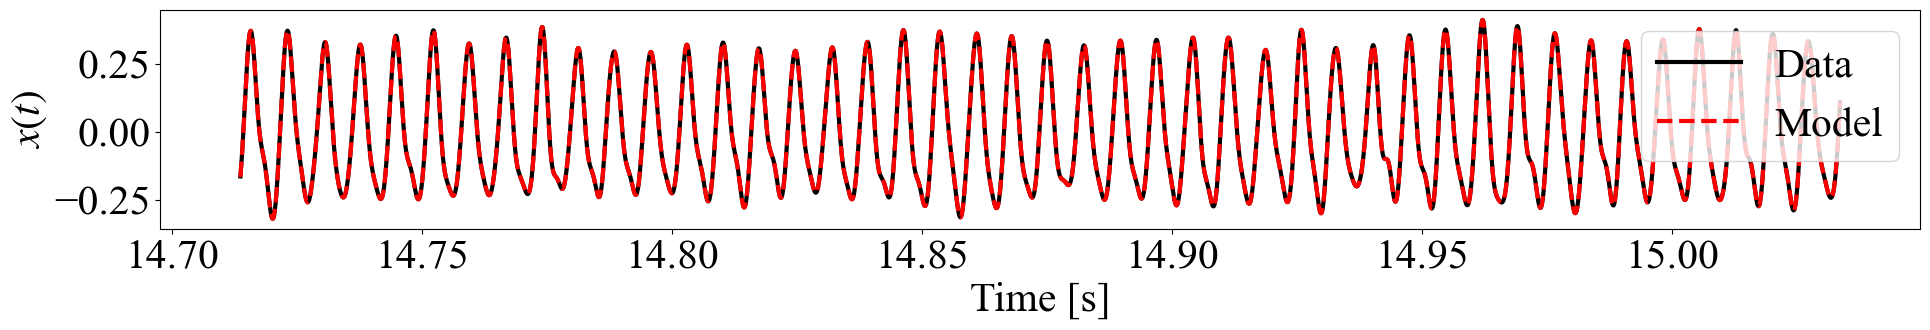

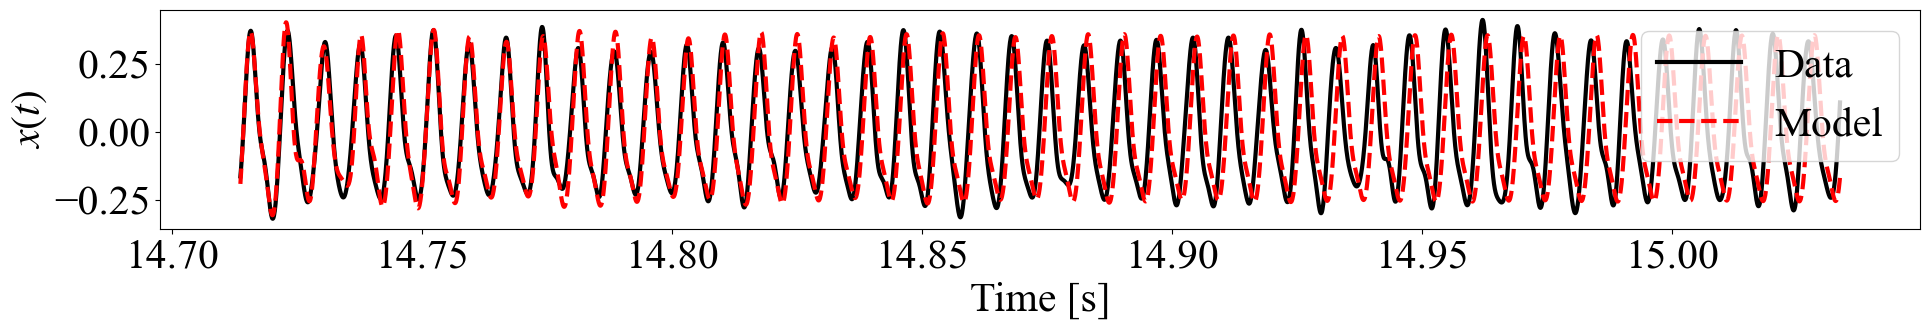

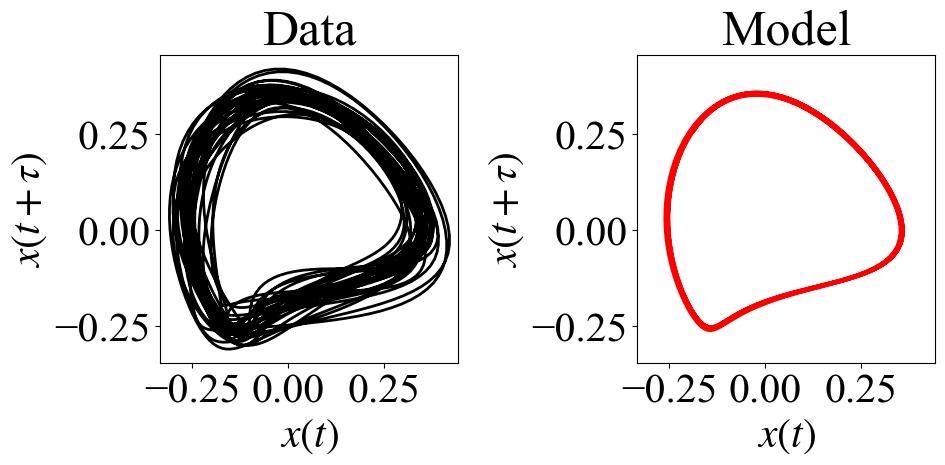

In [101]:
esn = EchoStateNetwork(
                    units=cfg.ESN_PARAMS['units'], 
                    SR=cfg.ESN_PARAMS['SR'], 
                    input_shape=cfg.ESN_PARAMS['input_shape'], 
                    output_shape=cfg.ESN_PARAMS['output_shape'], 
                    W_in_scale=cfg.ESN_PARAMS['W_in_scale'], 
                    W_res_density=cfg.ESN_PARAMS['W_res_density'], 
                    leak_rate=cfg.ESN_PARAMS['leak_rate'], 
                    alpha=cfg.ESN_PARAMS['alpha'], 
                    seed=cfg.ESN_PARAMS['seed']
                    )

esn.fit(in_layer_data=train_X, out_layer_data=train_Y)

pred_test_Y = esn.predict(test_X)
fig_esn.plt_timeseries_of_data_and_model(test_Y[:, 0, 0], pred_test_Y[:, 0], test_t, 4000)

n_freerun = 5000
freerun_test_Y = esn.freerun(in_layer_data0=test_X[0], pred_range=n_freerun, return_reservoir=False)
fig_esn.plt_timeseries_of_data_and_model(test_Y[:, 0, 0], freerun_test_Y[:, 0], test_t, 4000)
fig_esn.plt_attractor_of_data_and_model(test_Y[2000:, 0, 0], freerun_test_Y[2000:, 0], 3000, 20)

In [102]:
lyapunov_exponents, dims = esn.computing_lyapunov_exponent(dt=mic_t_data[1]-mic_t_data[0])
pickle.dump(esn, open(cfg.MODEL_DIR+cfg.DATA_NAME+'.pkl', "wb"))

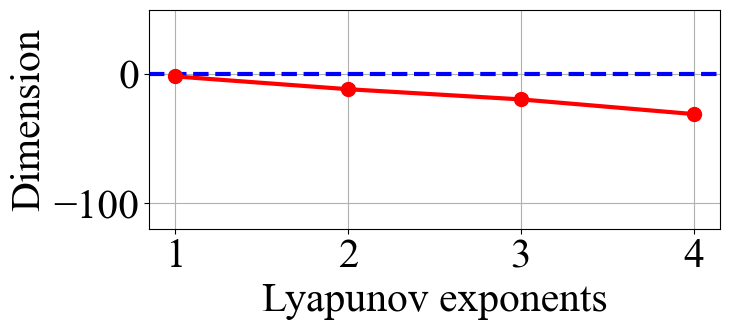

In [104]:
fig_esn.plt_lyapunov_exponents(lyapunov_exponents)

## Figure

In [49]:
class Figure():

    def __init__(self, rcParams_dict):
        for key in rcParams_dict.keys():
            plt.rcParams[str(key)] = rcParams_dict[str(key)]   

    def plt_esn_results(self, 
                data, model, t, lyapunov_exponents, 
                figsize=(25, 4), width_ratios=[4, 7, 8], wspace=0.5,
                n_shift=25, n_initdel=2000, n_plt=3000, same_lim=True,
                freq_lim=(50, 350),
                n_dim=4, lyapunov_lim=(-110, 20), 
                panel_list = ['(a)', '(b)', '(c)'], panel_xy_list=[(0.17, 1.05), (0.27, 1.05), (0.31, 1.05)], panel_fontsize=40, 
                save_filename=None):
        spec = gridspec.GridSpec(ncols=3, nrows=1, width_ratios=width_ratios, wspace=wspace)
        fig = plt.figure(figsize=figsize)
        freq_data, amp_data = fft(data, t)
        freq_model, amp_model = fft(model, t)

        ax1 = fig.add_subplot(spec[0])
        ax1.set_title('Model', loc='center')
        ax1.plot(model[n_initdel:][n_shift:][:n_plt], model[n_initdel:][:-n_shift][:n_plt], linestyle='-', c='r', lw=4)
        ax1.set_xlabel(r'$x(t)$')
        ax1.set_ylabel(r'$x(t-\tau)$')
        ax1.get_xaxis().set_major_formatter(plt.FormatStrFormatter('%.1f'))
        ax1.get_yaxis().set_major_formatter(plt.FormatStrFormatter('%.1f'))
        ax1.set_aspect('equal', 'datalim')
        fig.text(ax1.get_position().x1-panel_xy_list[0][0], ax1.get_position().y1-panel_xy_list[0][1], s=panel_list[0], fontsize=panel_fontsize)

        ax2 = fig.add_subplot(spec[1])
        ax2.plot(freq_data, amp_data, lw=5, c='k', label='Exp')
        ax2.plot(freq_model, amp_model, '--', lw=4, c='r', label='Model')
        ax2.set_xlabel('Frequency [Hz]')
        ax2.set_ylabel('Power Spectral Density')
        ax2.get_xaxis().set_major_formatter(plt.FormatStrFormatter('%d'))
        ax2.get_yaxis().set_major_formatter(plt.FormatStrFormatter('%.1f'))
        ax2.set_xlim(freq_lim)
        ax2.legend(frameon=False)
        fig.text(ax2.get_position().x1-panel_xy_list[1][0], ax2.get_position().y1-panel_xy_list[1][1], s=panel_list[1], fontsize=panel_fontsize)

        ax3 = fig.add_subplot(spec[2])
        ax3.axhline(y=0, xmin=0, xmax=n_dim+1, linestyle='dashed', c='b', lw=4)
        ax3.plot(np.arange(1, n_dim+1), lyapunov_exponents[:n_dim], linestyle='-', c='r', 
                lw=4, marker='o', markersize=15)
        ax3.grid()
        ax3.set_ylim(lyapunov_lim)
        ax3.set_xlabel('Dimension')
        ax3.set_ylabel('Lyapunov Exponents')
        fig.text(ax3.get_position().x1-panel_xy_list[2][0], ax3.get_position().y1-panel_xy_list[2][1], s=panel_list[2], fontsize=panel_fontsize)

        plt.tight_layout()
        if save_filename==None:
            plt.show()
        else:
            plt.savefig(save_filename, bbox_inches="tight")

In [179]:
class Figure():

    def __init__(self, rcParams_dict):
        for key in rcParams_dict.keys():
            plt.rcParams[str(key)] = rcParams_dict[str(key)]   

    def plt_esn_results(self, 
                data, model, t, lyapunov_exponents, 
                figsize=(25, 5), width_ratios=[4, 7, 8], wspace=0.3,
                n_shift=25, n_initdel=2000, n_plt=3000, same_lim=True,
                freq_lim=(50, 350),
                n_dim=4, lyapunov_lim=(-110, 20), 
                panel_list = ['(a)', '(b)', '(c)'], panel_xy_list=[(0.17, 1.05), (0.27, 1.05), (0.31, 1.05)], panel_fontsize=40, 
                save_filename=None):
        spec = gridspec.GridSpec(ncols=3, nrows=1, width_ratios=width_ratios, wspace=wspace)
        fig = plt.figure(figsize=figsize)
        freq_data, amp_data = fft(data, t)
        freq_model, amp_model = fft(model, t)

        ax1 = fig.add_subplot(spec[0])
        ax1.set_title(None, loc='center')
        ax1.plot(model[n_initdel:][n_shift:][:n_plt], model[n_initdel:][:-n_shift][:n_plt], linestyle='-', c='k', lw=4)
        ax1.set_xlabel(r'$x(t)$')
        ax1.set_ylabel(r'$x(t-\tau)$')
        ax1.get_xaxis().set_major_formatter(plt.FormatStrFormatter('%.1f'))
        ax1.get_yaxis().set_major_formatter(plt.FormatStrFormatter('%.1f'))
        ax1.set_aspect('equal', 'datalim')
        fig.text(ax1.get_position().x1-panel_xy_list[0][0], ax1.get_position().y1-panel_xy_list[0][1], s=panel_list[0], fontsize=panel_fontsize)

        ax2 = fig.add_subplot(spec[1])
        ax2.plot(freq_model, amp_model, '-', lw=4, c='k', label='Model')
        ax2.set_xlabel('Frequency [Hz]')
        ax2.set_ylabel('Power Spectral Density')
        ax2.get_xaxis().set_major_formatter(plt.FormatStrFormatter('%d'))
        ax2.get_yaxis().set_major_formatter(plt.FormatStrFormatter('%.1f'))
        ax2.set_xlim(freq_lim)
        fig.text(ax2.get_position().x1-panel_xy_list[1][0], ax2.get_position().y1-panel_xy_list[1][1], s=panel_list[1], fontsize=panel_fontsize)

        ax3 = fig.add_subplot(spec[2])
        ax3.axhline(y=0, xmin=0, xmax=n_dim+1, linestyle='dashed', c='k', lw=4)
        ax3.plot(np.arange(1, n_dim+1), lyapunov_exponents[:n_dim], linestyle='-', c='k', 
                lw=4, marker='o', markersize=15)
        ax3.grid()
        ax3.set_ylim(lyapunov_lim)
        ax3.set_xlabel('Dimension')
        ax3.set_ylabel('Lyapunov Exponents')
        fig.text(ax3.get_position().x1-panel_xy_list[2][0], ax3.get_position().y1-panel_xy_list[2][1], s=panel_list[2], fontsize=panel_fontsize)

        plt.tight_layout()
        if save_filename==None:
            plt.show()
        else:
            plt.savefig(save_filename, bbox_inches="tight")

In [181]:
fig = Figure({
                    'font.family':'Times New Roman',
                    'mathtext.fontset':'stix',
                    'font.size':30,
                    })

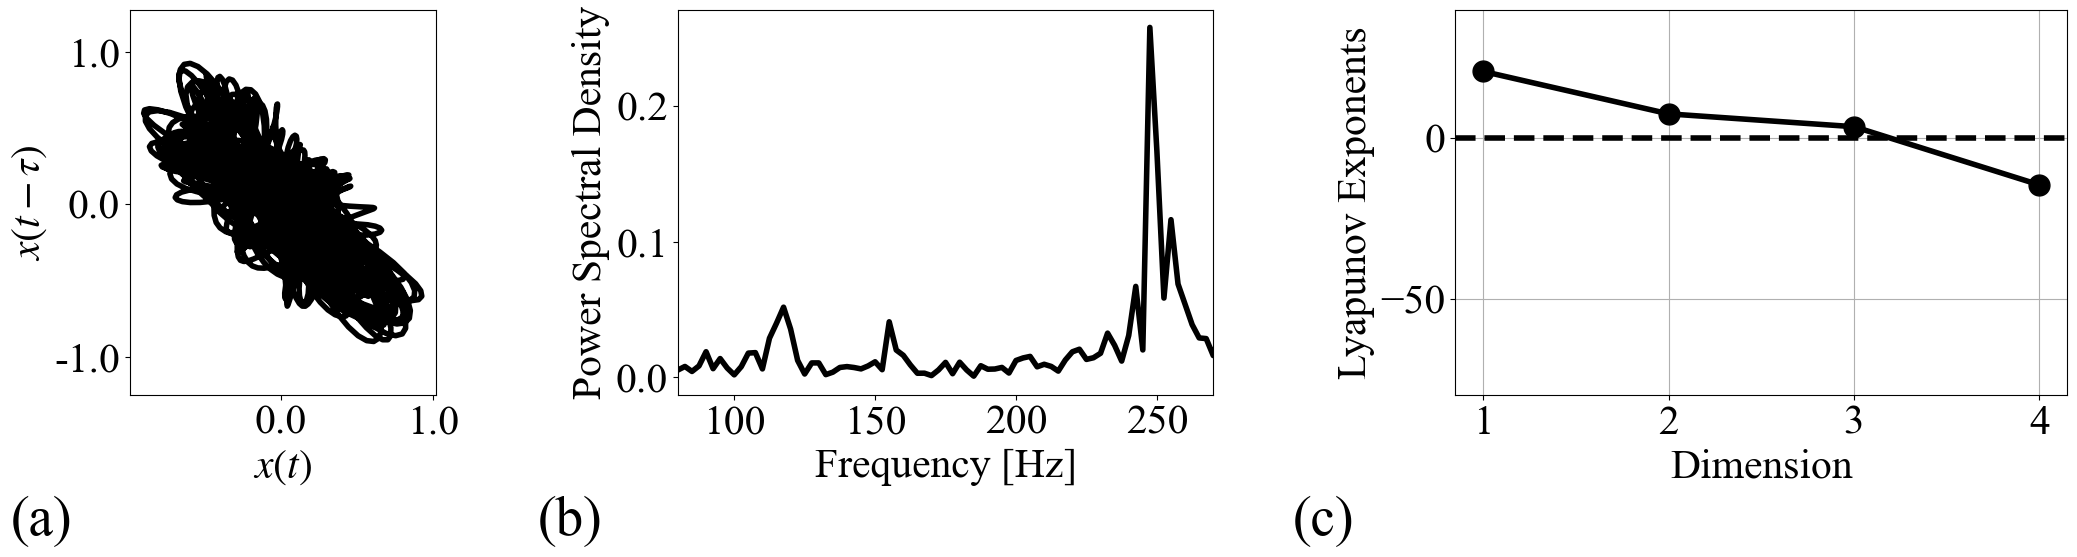

In [177]:
fig.plt_esn_results(test_Y[:5000, 0, 0], esn.freerun_ans[:, 0], test_t[:], esn.lyapunov_exponents,

            ### MRI8_NVF4_10mm_0p0mmVVVV
            n_shift=20, same_lim=False, freq_lim=(80, 270), lyapunov_lim=(-80, 40), panel_list = ['(a)', '(b)', '(c)'],

            save_filename=None)

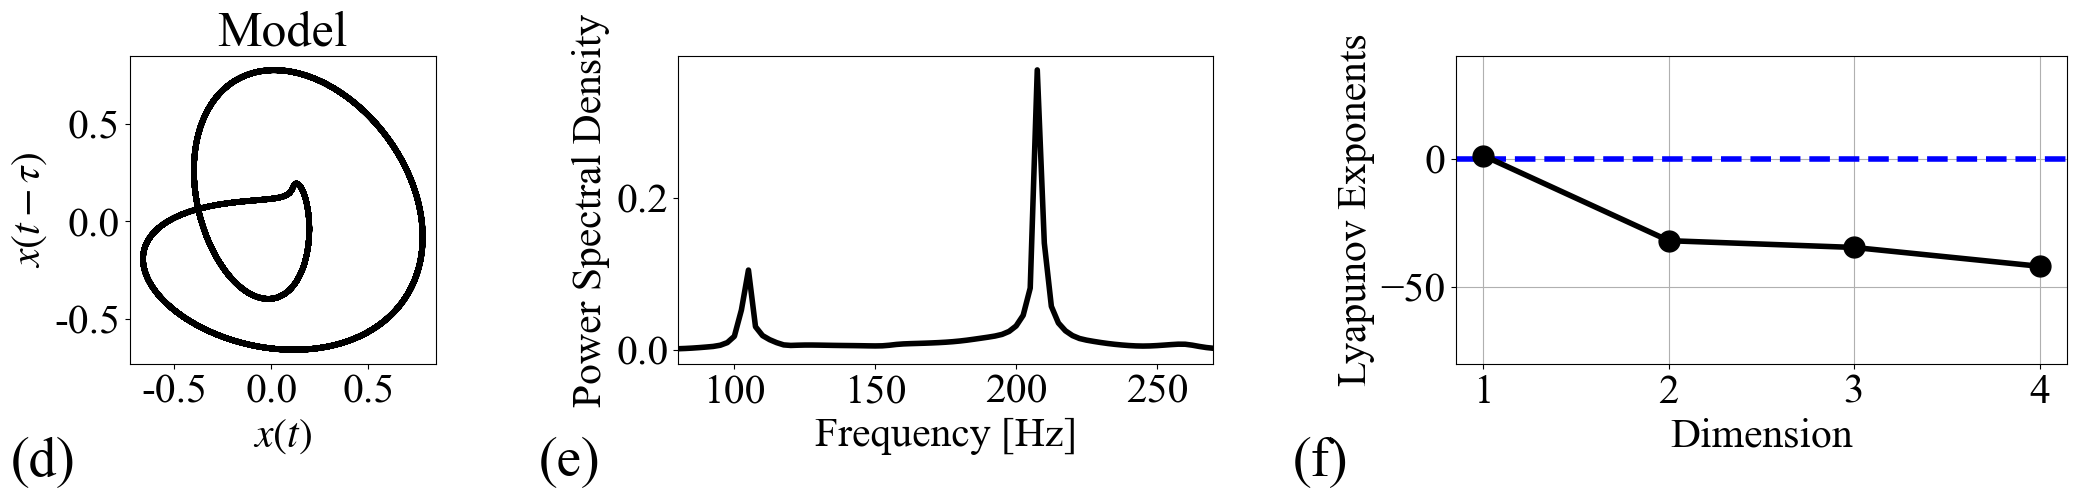

In [162]:
fig.plt_esn_results(test_Y[:, 0, 0], esn.freerun_ans[:, 0], test_t[:], esn.lyapunov_exponents,

            ### MRI8_NVF4_10mm_0p0mmVVVV
            n_shift=13, same_lim=False, freq_lim=(80, 270), lyapunov_lim=(-80, 40), panel_list = ['(d)', '(e)', '(f)'],

            save_filename=None)

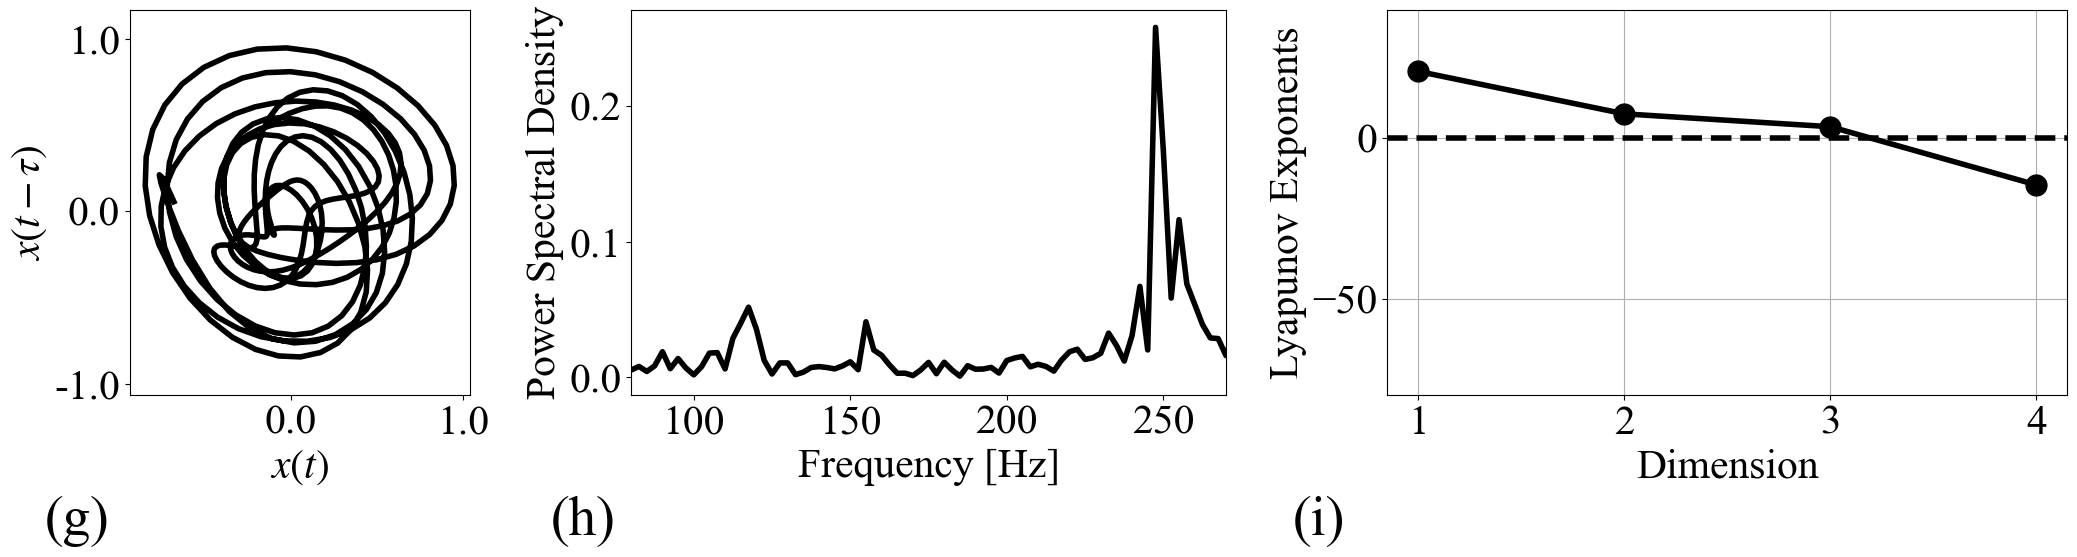

In [182]:
fig.plt_esn_results(test_Y[:8000, 0, 0], esn.freerun_ans[:, 0], test_t[:], esn.lyapunov_exponents,

            ### MRI8_NVF4_10mm_0p0mmVVVV
            n_initdel=0, n_plt=450, n_shift=9, same_lim=False, freq_lim=(80, 270), lyapunov_lim=(-80, 40), panel_list = ['(g)', '(h)', '(i)'],

            save_filename=None)

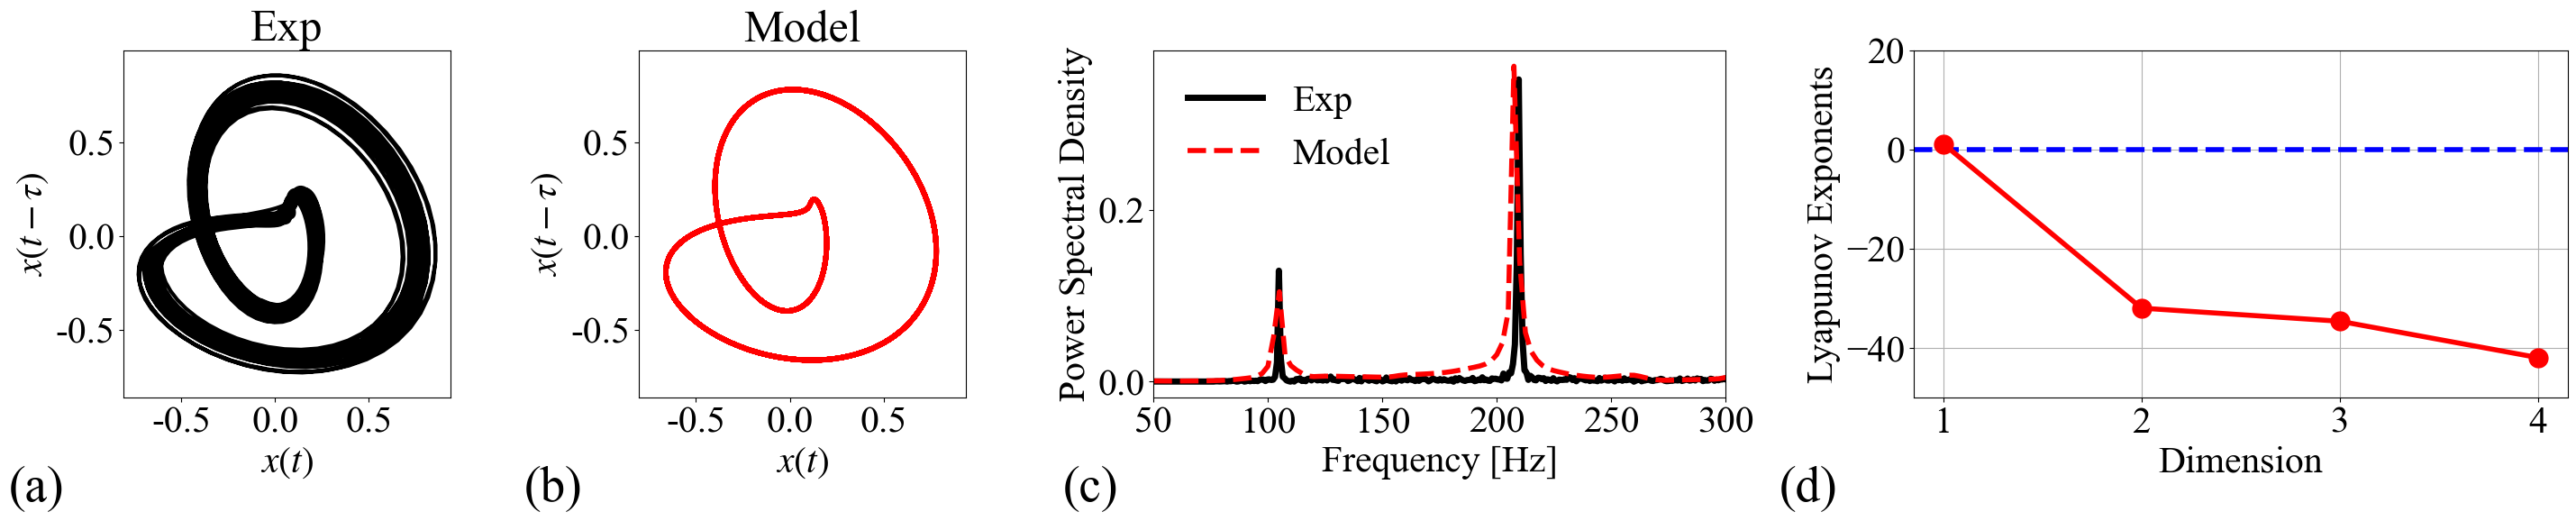

In [8]:
fig.figure03(test_Y[:, 0, 0], esn.freerun_ans[:, 0], test_t[:], esn.lyapunov_exponents,

            ### MRI8_NVF4_10mm_0p0mmVVV
            n_shift=13, freq_lim=(50, 300), lyapunov_lim=(-50, 20), panel_list = ['(a)', '(b)', '(c)', '(d)'], 

            save_filename='./results/figure/figure03-1.eps')

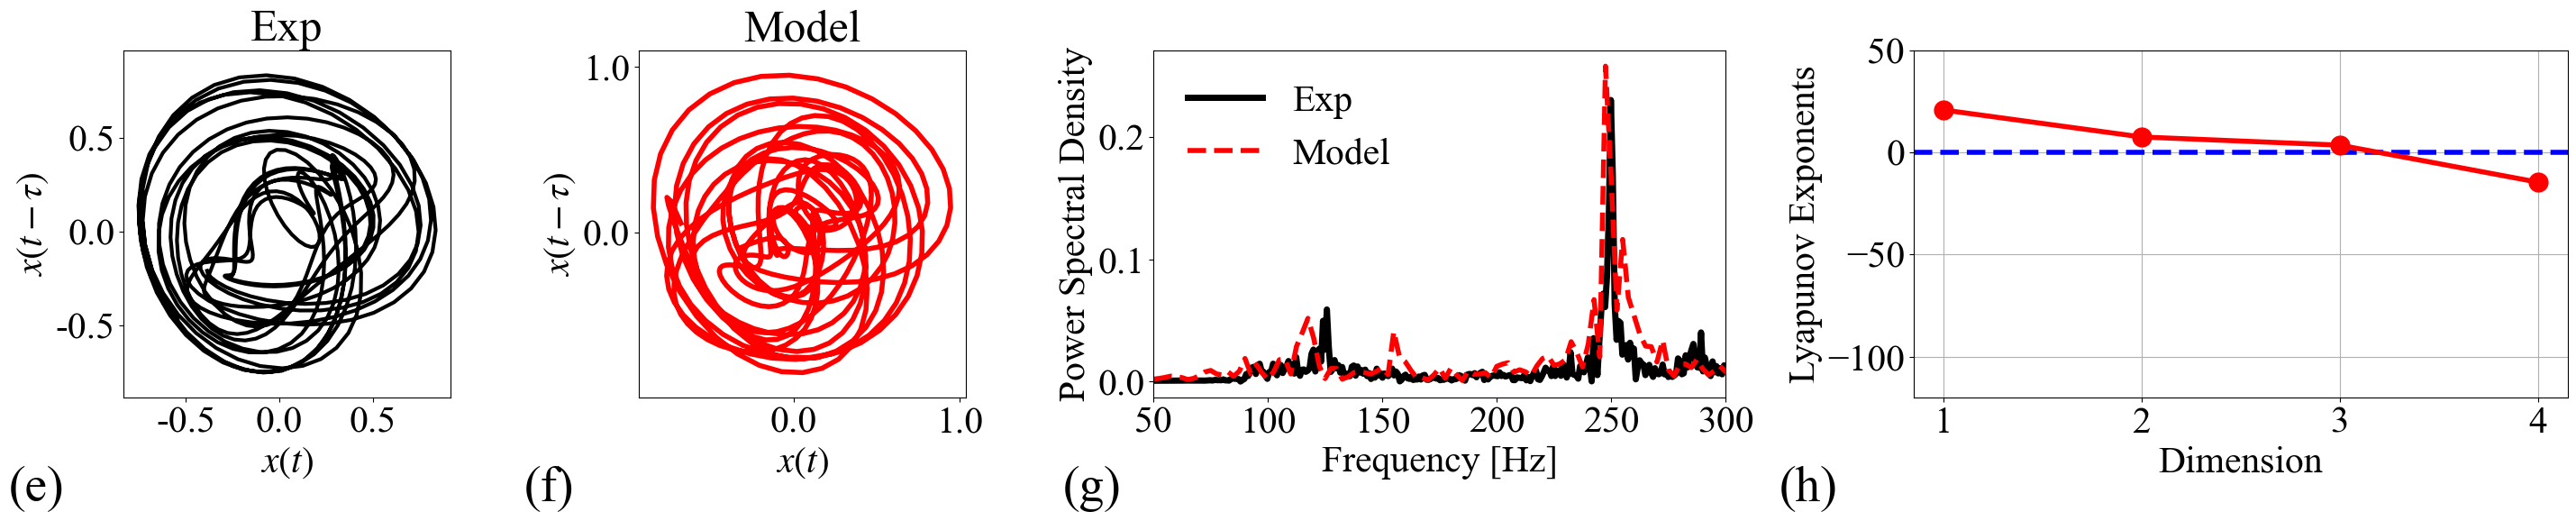

In [7]:
fig.figure03(test_Y[:, 0, 0], esn.freerun_ans[:, 0], test_t[:], esn.lyapunov_exponents,

            ### MRI8_NVF4_10mm_0p0mmVVVV
            n_initdel=0, n_plt=800, n_shift=9, same_lim=False, freq_lim=(50, 300), lyapunov_lim=(-120, 50), panel_list = ['(e)', '(f)', '(g)', '(h)'], 

            save_filename='./results/figure/figure03-2.eps')

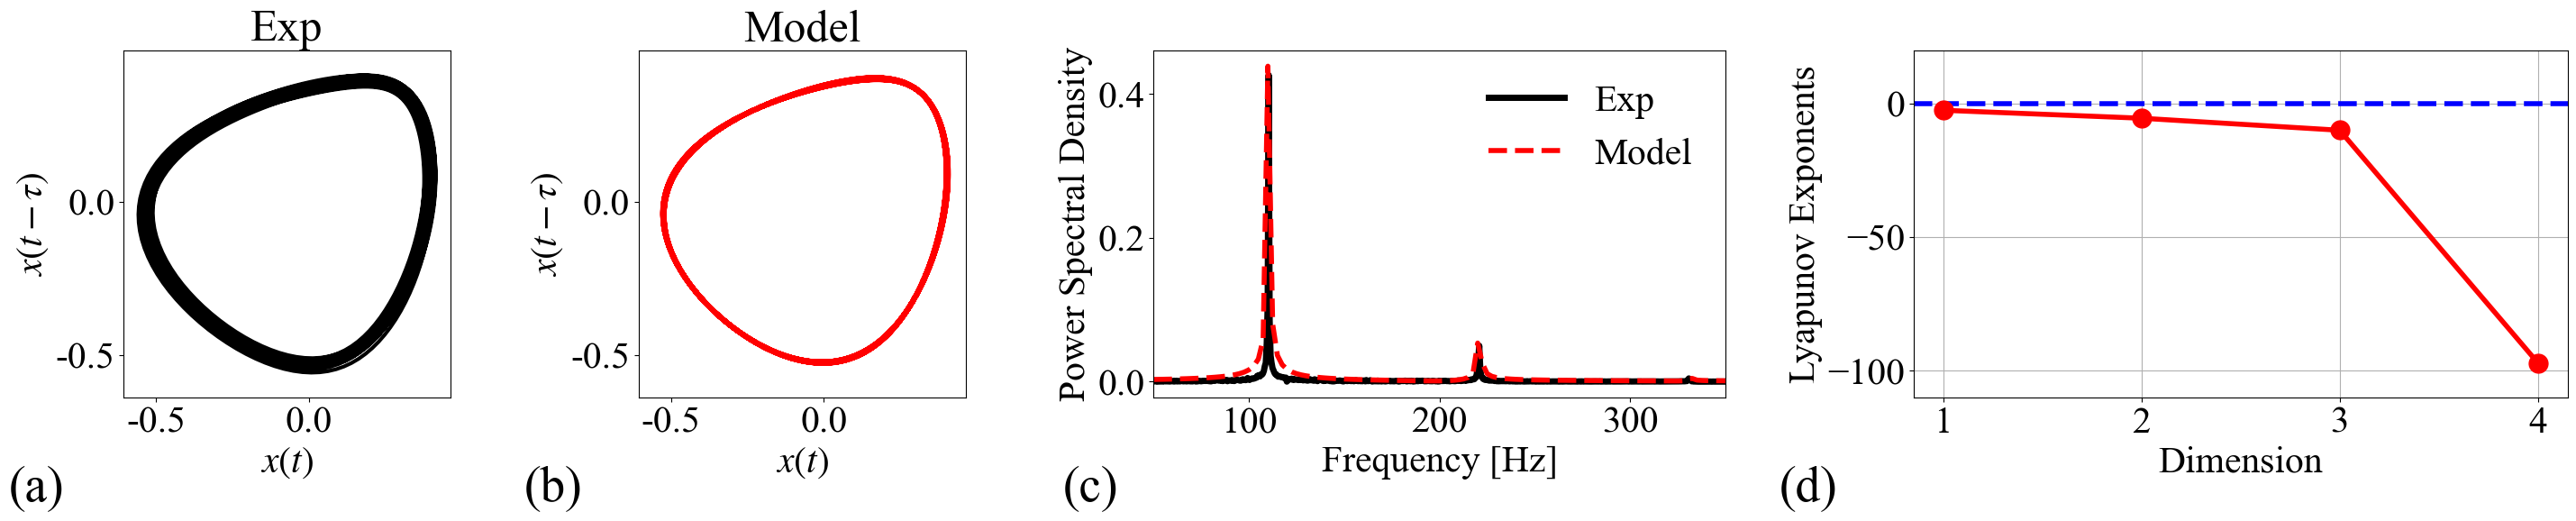

In [8]:
fig.figure03(test_Y[:, 0, 0], esn.freerun_ans[:, 0], test_t[:], esn.lyapunov_exponents,

            panel_list = ['(a)', '(b)', '(c)', '(d)'], 

            save_filename='./results/figure/figure07-d1p2m0p75.eps')

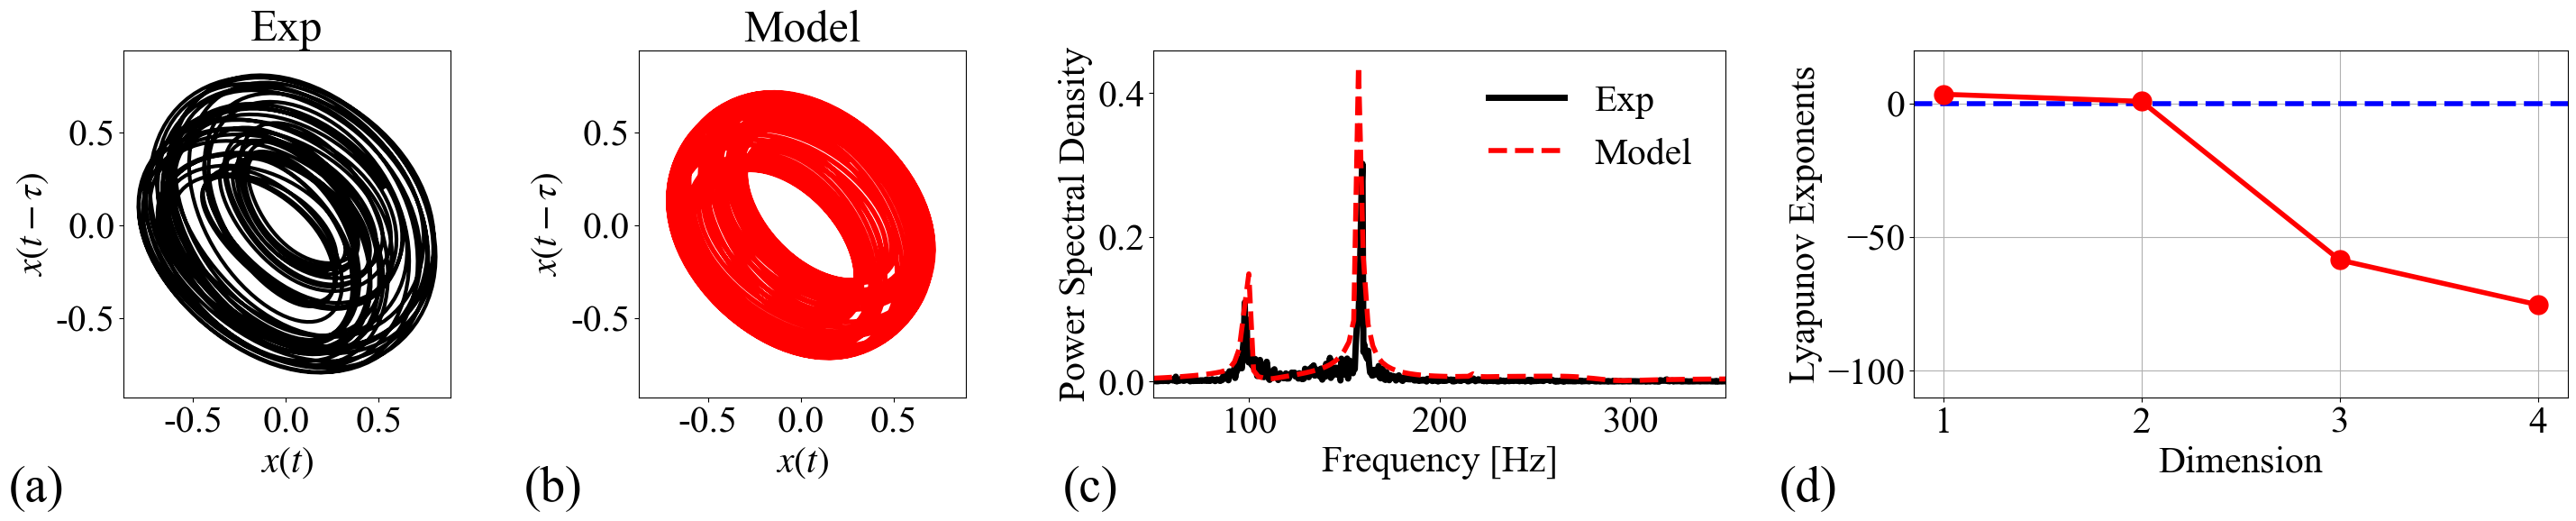

In [8]:
fig.figure03(test_Y[:, 0, 0], esn.freerun_ans[:, 0], test_t[:], esn.lyapunov_exponents,

            panel_list = ['(a)', '(b)', '(c)', '(d)'], 

            save_filename='./results/figure/figure07-d0p4m0p75.png')

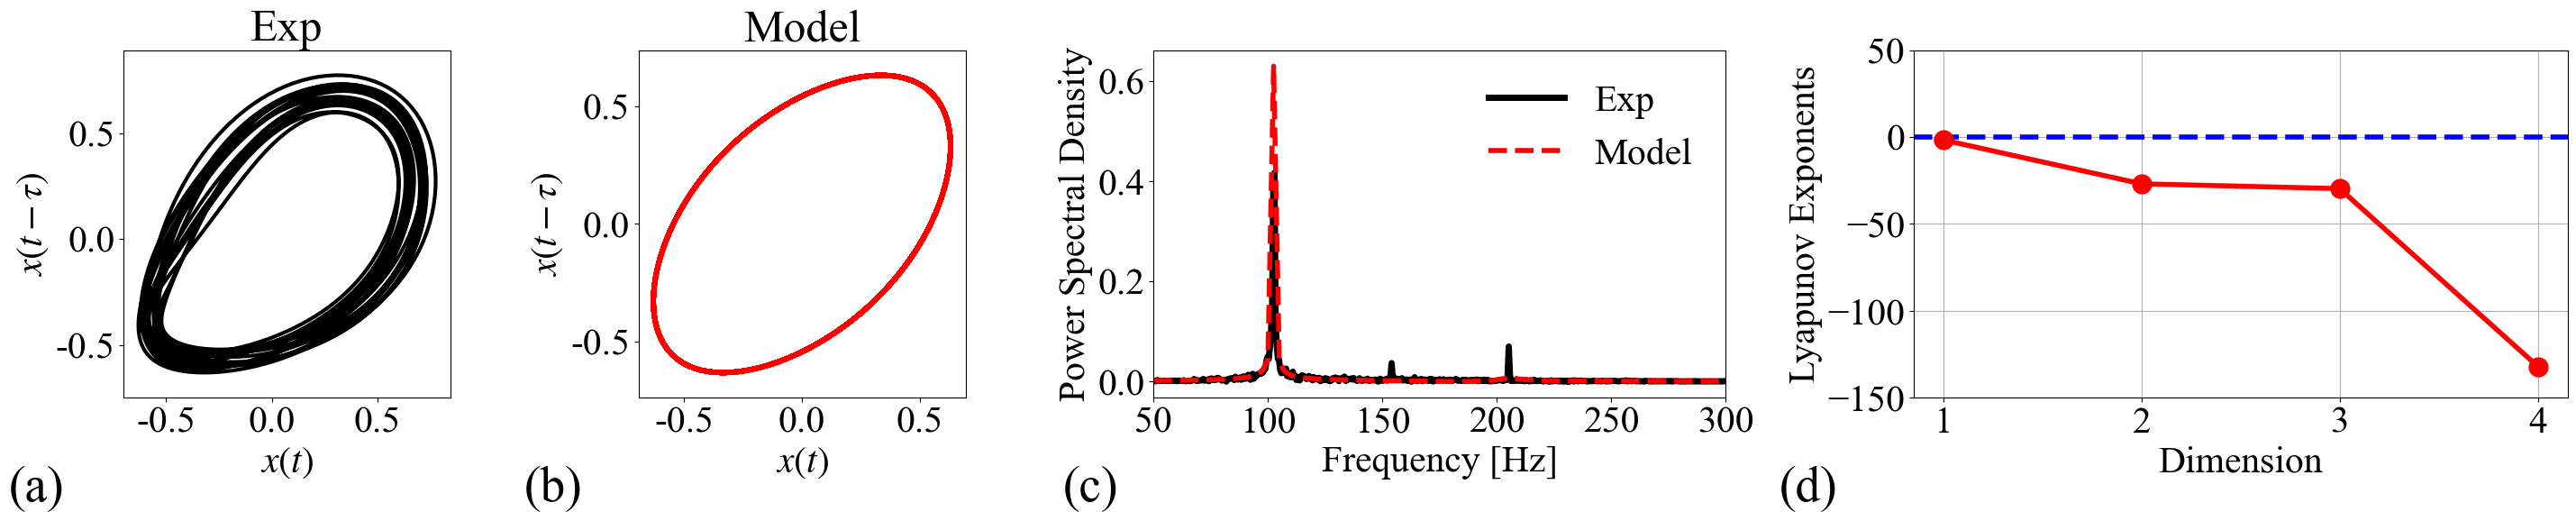

In [7]:
fig.figure03(test_Y[:, 0, 0], esn.freerun_ans[:, 0], test_t[:], esn.lyapunov_exponents,

            ### MRI8_NVF4_10mm_0p0mmVVVV
            n_initdel=3000, n_plt=2000, n_shift=20, same_lim=False, freq_lim=(50, 300), lyapunov_lim=(-150, 50), panel_list = ['(a)', '(b)', '(c)', '(d)'], 

            save_filename='./results/figure/figure07-d2p0-m2p5.png')

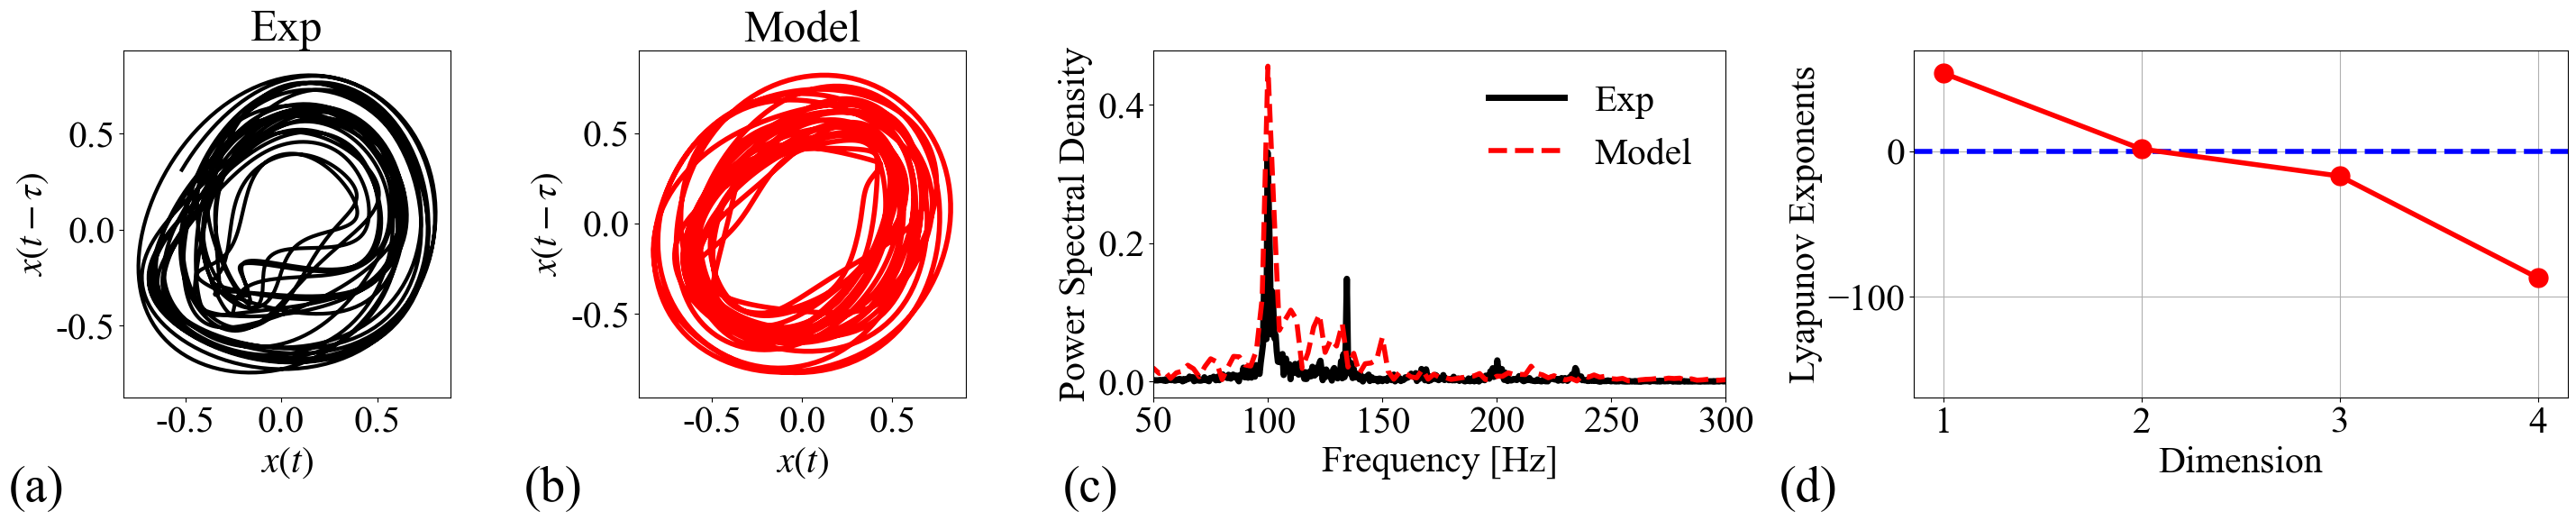

In [7]:
fig.figure03(test_Y[:, 0, 0], esn.freerun_ans[:, 0], test_t[:], esn.lyapunov_exponents,

            ### MRI8_NVF4_10mm_0p0mmVVVV
            n_initdel=2000, n_plt=3000, n_shift=25, same_lim=False, freq_lim=(50, 300), lyapunov_lim=(-170, 70), panel_list = ['(a)', '(b)', '(c)', '(d)'], 

            save_filename='./results/figure/figure07-d1p8-m2p5.eps')

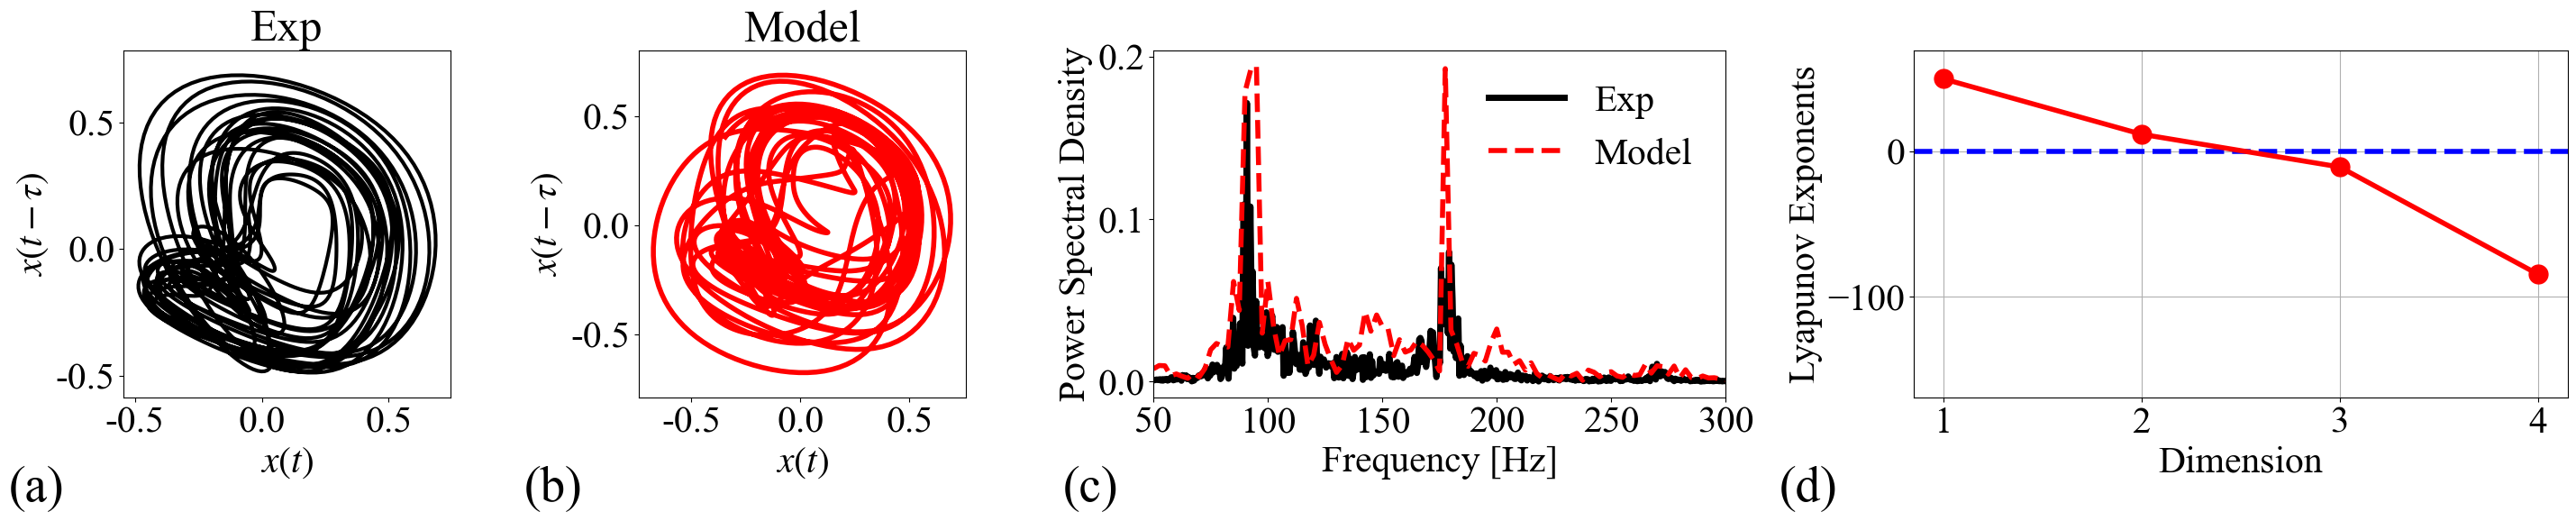

In [7]:
fig.figure03(test_Y[:, 0, 0], esn.freerun_ans[:, 0], test_t[:], esn.lyapunov_exponents,

            ### MRI8_NVF4_10mm_0p0mmVVVV
            n_initdel=2000, n_plt=3000, n_shift=25, same_lim=False, freq_lim=(50, 300), lyapunov_lim=(-170, 70), panel_list = ['(a)', '(b)', '(c)', '(d)'], 

            save_filename='./results/figure/figure07-d1p2-m0p75.eps')

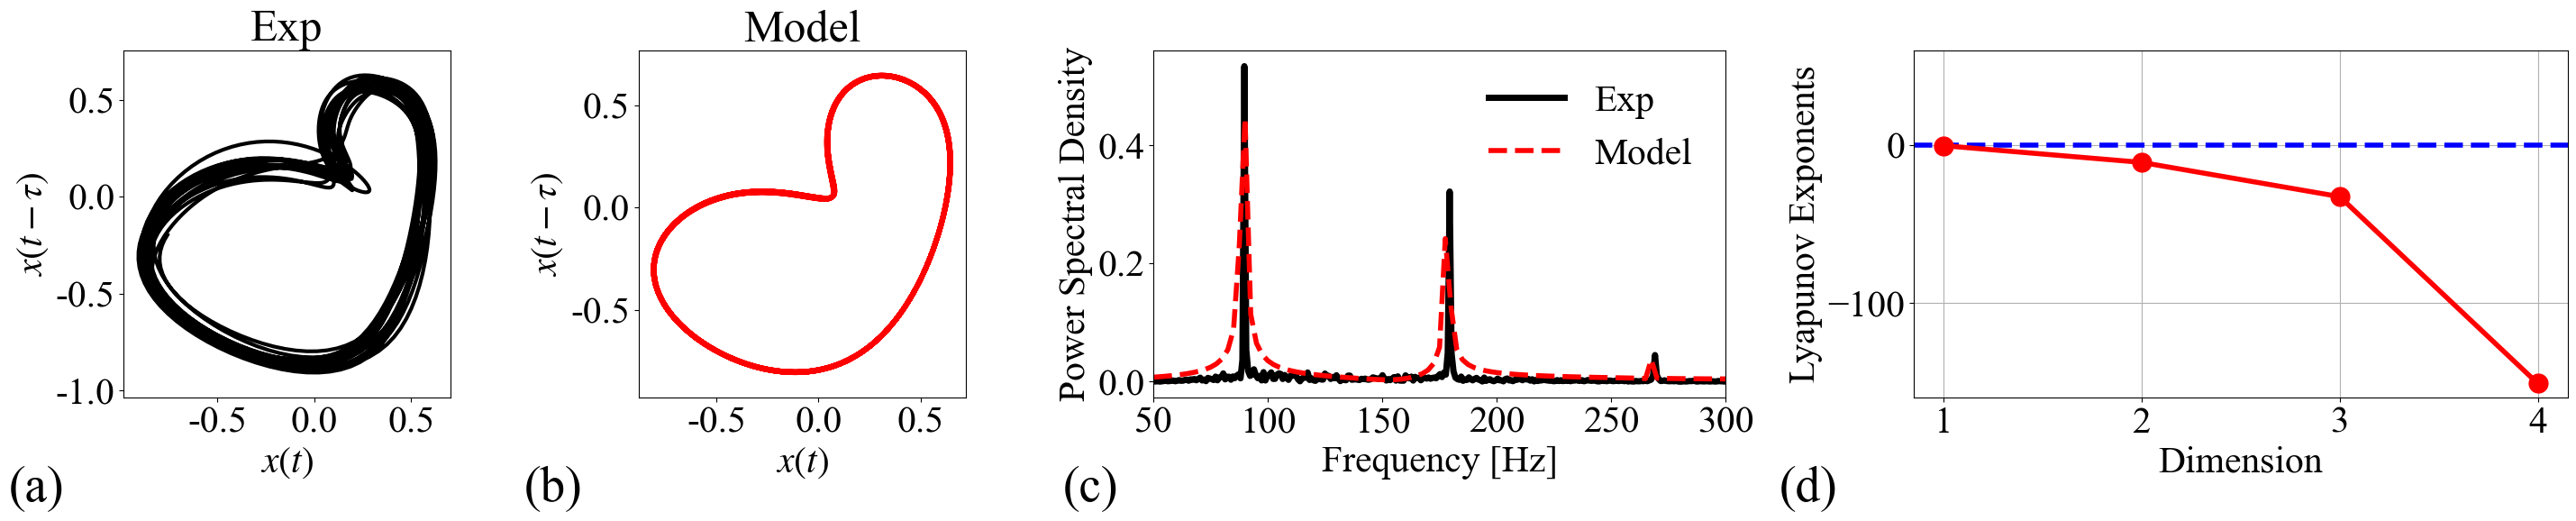

In [8]:
fig.figure03(test_Y[:, 0, 0], esn.freerun_ans[:, 0], test_t[:], esn.lyapunov_exponents,

            ### MRI8_NVF4_10mm_0p0mmVVVV
            n_initdel=3000, n_plt=2000, n_shift=20, same_lim=False, freq_lim=(50, 300), lyapunov_lim=(-160, 60), panel_list = ['(a)', '(b)', '(c)', '(d)'], 

            save_filename='./results/figure/figure07-d0p4-m0p75.png')

c:\Users\rm0179rx\project\github\rhythm-lab\DDA-VFFVF\src\lib\methods.py:738: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


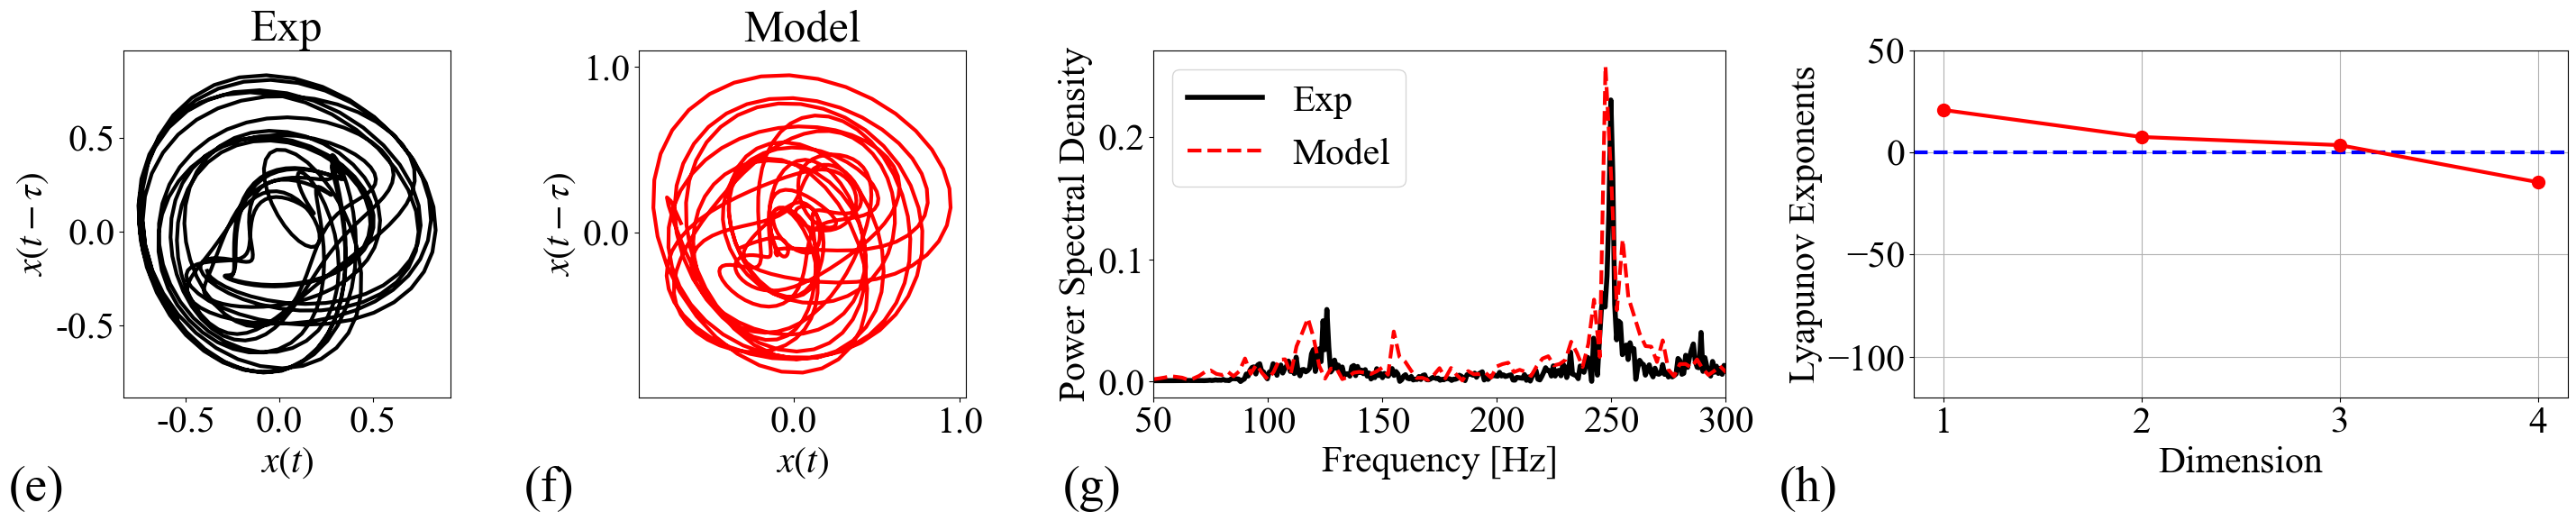

In [6]:
fig.figure03(test_Y[:, 0, 0], esn.freerun_ans[:, 0], test_t[:], esn.lyapunov_exponents,
            #MRI5_NVF1_10mm_1p2mmV_1
            #panel_list = ['(a)', '(b)', '(c)', '(d)'], 

            #MRI5_NVF1_10mm_0p4mmV_1
            #panel_list = ['(e)', '(f)', '(g)', '(h)'], 

            ### MRI8_NVF4_10mm_0p0mmVVV
            #n_shift=13, freq_lim=(50, 300), lyapunov_lim=(-50, 20), panel_list = ['(a)', '(b)', '(c)', '(d)'], 

            ### MRI8_NVF4_10mm_0p0mmVVVV
            n_initdel=0, n_plt=800, n_shift=9, same_lim=False, freq_lim=(50, 300), lyapunov_lim=(-120, 50), panel_list = ['(e)', '(f)', '(g)', '(h)'], 


            save_filename=None)